# First exploration of the IPSP data

In [53]:
from os import makedirs
from os.path import join
import torch as pt
import numpy as np
import matplotlib.pyplot as plt
import imageio
import shutil


plt.rcParams["figure.dpi"] = 180
output_path = "../output"
data_path = "../data"
makedirs(output_path, exist_ok=True)

In [54]:
cp = pt.load(join(data_path, "cp_clean.pt"))
coords = pt.load(join(data_path, "coords.pt"))

: 

: 

In [ ]:
cp.keys()

dict_keys(['ma0.84_alpha1.50', 'ma0.84_alpha3.00', 'ma0.84_alpha3.50', 'ma0.84_alpha4.00', 'ma0.84_alpha4.50', 'ma0.84_alpha5.00', 'ma0.84_alpha6.00', 'ma0.90_alpha-2.50', 'ma0.90_alpha1.50', 'ma0.90_alpha2.50', 'ma0.90_alpha4.00', 'ma0.90_alpha5.00', 'ma0.90_alpha6.00'])

In [ ]:
keys_084 = [key for key in cp.keys() if "0.84" in key]
keys_090 = [key for key in cp.keys() if "0.90" in key]

In [ ]:
keys_084

['ma0.84_alpha1.50',
 'ma0.84_alpha3.00',
 'ma0.84_alpha3.50',
 'ma0.84_alpha4.00',
 'ma0.84_alpha4.50',
 'ma0.84_alpha5.00',
 'ma0.84_alpha6.00']

In [ ]:
keys_090

['ma0.90_alpha-2.50',
 'ma0.90_alpha1.50',
 'ma0.90_alpha2.50',
 'ma0.90_alpha4.00',
 'ma0.90_alpha5.00',
 'ma0.90_alpha6.00']

In [ ]:
# the shape of every dataset id N_x x N_y x N_t
cp_test = cp["ma0.84_alpha4.00"]
cp_test.shape

torch.Size([465, 159, 2000])

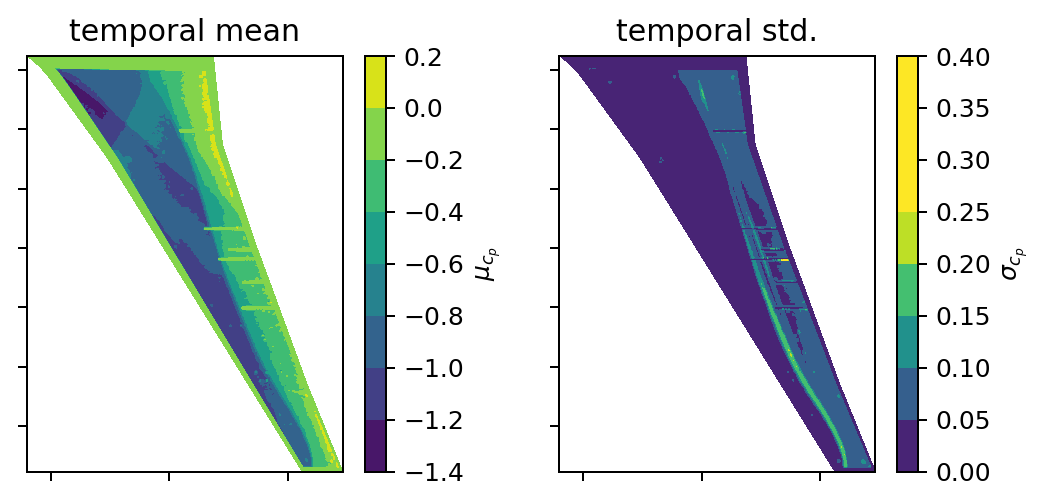

In [ ]:
# plot mean and standard deviation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharex=True, sharey=True)
x, y = coords["ma0.84_alpha4.00"]
cont1 = ax1.contourf(x, y, cp_test.mean(dim=-1))
plt.colorbar(cont1, ax=ax1, label=r"$\mu_{c_p}$")
ax1.set_title("temporal mean")
cont2 = ax2.contourf(x, y, cp_test.std(dim=-1), vmin=0.0, vmax=0.25)
plt.colorbar(cont2, ax=ax2, label=r"$\sigma_{c_p}$")
ax2.set_title("temporal std.")
for ax in (ax1, ax2):
    ax.set_aspect("equal")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.savefig(join(output_path, "ma084_alpha400_mean_std.png"), bbox_inches="tight")
plt.show()

# Temporal Behaviour

In [ ]:
# Function to create a single frame given a time-step index
def create_frame(t):
    fig = plt.figure(figsize=(4, 4))
    cont = plt.contourf(x, y, cp_test[:,:, t])
    plt.colorbar(cont, label=r"$c_p$")
    plt.title("Pressure distribution at time-step {}".format(t))
    plt.gca().set_aspect("equal")
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    plt.savefig("../output/frames/ma084_alpha400_{}.png".format(t), 
                transparent=False,
                facecolor = "white")
    plt.close()

In [ ]:
# Looping over time-steps to create a gif
frames = []
steps = 50
for t in range(steps):
    create_frame(t)
    image = imageio.v2.imread("../output/frames/ma084_alpha400_{}.png".format(t))
    frames.append(image)

In [ ]:
shutil.rmtree("../output/frames")
imageio.mimsave("../output/example_gif.gif", frames, duration=10, loop = True)

![SegmentLocal](../output/example_gif.gif "segment")